### Christopher Ayre
### Data - 620

### Project 2

__ASSIGNMENT__

* Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

* Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

* What can you infer about each of the distinct groups?


__THE DATA - THE ACCUSED WITCHES__

Few events in American history are better known than the Salem witchcraft trials of 1692. The Accused Witches Data Set contains information about those who were formally accused of witchcraft during the Trials. The full dataset can be found on Kaggle: https://www.kaggle.com/rtatman/salem-witchcraft-dataset

The __"Accused Witch"__ column records the names of the 152 people mentioned in legal records as having been formally accused of witchcraft. 

__"Residence"__ identifies the community in which the accused person was living when accused of witchcraft. In a few cases, the residence of an accused witch is problematic. For Elizabeth How, for example, some records cite Ipswich while others name Topsfield as her home. In such cases, the most likely residence has been used. In a few instances, the residence entry does not reflect the actual geographic relationship of the accused with the trials. George Burroughs was living in Wells, Maine, in 1692, but he had been a controversial minister in Salem Village in the early 1680s.

__"Month of Accusation"__ numerically expresses the month of the year in which an alleged witch was accused: "1"=January 1692; "6"=June 1692; and "13"=January 1693. 

In [2]:
#LIBRARY IMPORTS

import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

In [3]:
# DATA IMPORT
df = pd.read_csv("Accused-Witches.csv")
df.head()

,Accused Witch,Residence,Month of Accusation
0,"Abbott, Arthur",Ipswich,5
1,"Abbott, Nehemiah, Jr.",Topsfield,4
2,"Alden, John",Boston,5
3,"Andrew, Daniel",Salem Village,5
4,"Barker, Abigail",Andover,9


__Creating the Bipartite Graph for later analysis and inspecting the info__ 

In [5]:
G = nx.from_pandas_edgelist(df=df, source='Accused Witch', target=' Residence ', edge_attr=['Month of Accusation'])

members = df.iloc[:, 0].unique().tolist()
groups = df.iloc[:,1].unique().tolist()

G.add_nodes_from(members, bipartite=0)
G.add_nodes_from(groups, bipartite=1)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 175
Number of edges: 152
Average degree:   1.7371


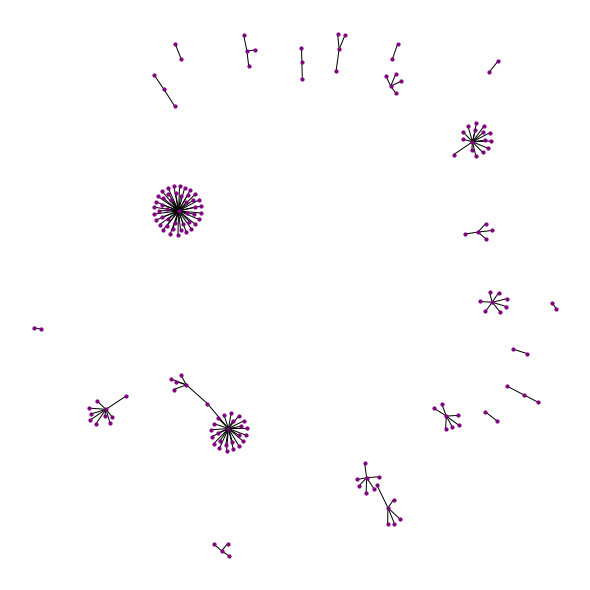

In [39]:
plt.figure(3,figsize=(8,8)) 
nx.draw(G, node_size=10, node_color='purple')

Graph depicts the different towns and their Residents. The largest hub depicts Salem Town, most famous for the witch trials.

Name: 
Type: Graph
Number of nodes: 24
Number of edges: 1
Average degree:   0.0833


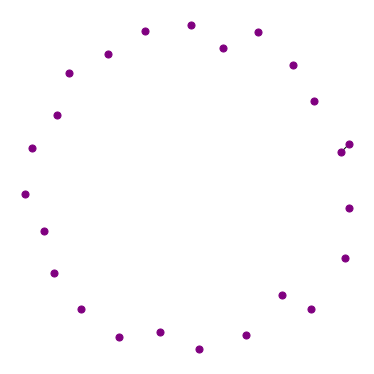

In [36]:
mem, grp = bipartite.sets(G, set(members))
group_association = bipartite.weighted_projected_graph(G, grp)
print(nx.info(group_association))

plt.figure(3,figsize=(5,5)) 
nx.draw(group_association, node_size=50, node_color='purple')

The Bipartite graph of the group network displays a lack of togetherness. The Accused witches were mainly from different towns, we see 24 nodes each representing a different town. The one connection may be due to two witches with the same name.

In [14]:
# Creating new columns for comparison network analysis

degree = pd.DataFrame.from_dict(dict(nx.degree(group_association)), orient='index', columns=['Degree'])
degree_centrality = pd.DataFrame.from_dict(nx.degree_centrality(group_association), orient='index', columns=['Degree_Centrality'])
eigenvector_centrality = pd.DataFrame.from_dict(nx.eigenvector_centrality(group_association), orient='index', columns=['Eigenvector_Centrality'])
closeness_centrality = pd.DataFrame.from_dict(nx.closeness_centrality(group_association), orient='index', columns=['Closeness Centrality'])
betweenness_centrality = pd.DataFrame.from_dict(nx.betweenness_centrality(group_association), orient='index', columns=['Betweenness Centrality'])

dfs = [degree,degree_centrality,eigenvector_centrality,closeness_centrality,betweenness_centrality]

In [16]:
metrics = pd.concat([degree, degree_centrality], axis=1, join_axes=[degree.index])
metrics = pd.concat([metrics, eigenvector_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, closeness_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, betweenness_centrality], axis=1, join_axes=[metrics.index])

In [17]:
metrics.sort_values(by=['Degree_Centrality', 'Eigenvector_Centrality'], ascending=False).head(10)

,Degree,Degree_Centrality,Eigenvector_Centrality,Closeness Centrality,Betweenness Centrality
Salem Town,1,0.043478,7.071068e-01,0.043478,0.0
Lynn,1,0.043478,7.071068e-01,0.043478,0.0
Salisbury,0,0.000000,6.743496e-07,0.000000,0.0
Malden,0,0.000000,6.743496e-07,0.000000,0.0
Ipswich,0,0.000000,6.743496e-07,0.000000,0.0
Boston,0,0.000000,6.743496e-07,0.000000,0.0
Rowley,0,0.000000,6.743496e-07,0.000000,0.0
Beverly,0,0.000000,6.743496e-07,0.000000,0.0
Chelmsford,0,0.000000,6.743496e-07,0.000000,0.0
Woburn,0,0.000000,6.743496e-07,0.000000,0.0


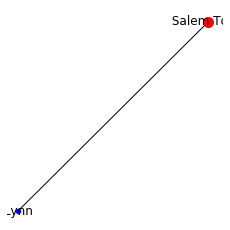

In [44]:

plt.figure(3,figsize=(3,3)) 
salem_ego = nx.ego_graph(group_association, ' Salem Town ')

# Draw graph
pos = nx.spring_layout(ego)
nx.draw(salem_ego, pos, node_color='b', node_size=20, with_labels=True)

nx.draw_networkx_nodes(salem_ego, pos, nodelist=[' Salem Town '], node_size=100, node_color='r')
plt.show()



__The Ego Network__ is a subnetwork that is based on a single node - Salem Town
Due to the lack of togetherness, Salem Town is the only one town worth looking at the Ego Network which reflects a connection with the town of Lynn.